# ACADEMIC INTERGITY STATEMENT
I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

# Part I: Data Analysis – Amazon Top Selling Book dataset

In [24]:
import statistics as st
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [25]:
# step 3 read csv file
AmazonD = pd.read_table('Amazon_top_selling_book.csv',sep=',')

In [197]:
# step 4 main statistics with pandas
print(AmazonD.describe)
print(AmazonD.head)
print(AmazonD.index)
print(AmazonD.columns)
print(AmazonD.dtypes)
print(AmazonD.size)
print(AmazonD.shape)

print(AmazonD.max(axis = 0))
print(AmazonD.min(axis = 0))
print(AmazonD.median(axis = 0))
print(AmazonD.mean(axis = 0))
print(AmazonD.std(axis = 0))

<bound method NDFrame.describe of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson

C:\Users\User\AppData\Local\Temp/ipykernel_5164/463433125.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(AmazonD.median(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_5164/463433125.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(AmazonD.mean(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_5164/463433125.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(AmazonD.std(axis = 0))


In [27]:
# step 5  data preprocessing
    # sum of missing entries
print(pd.isnull(AmazonD).sum(axis=0))

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [28]:
# convert the columns with datatype string to data type categorical
    # no string in the dataset

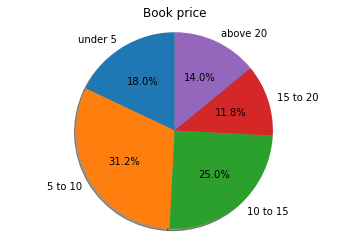

In [29]:
# step 7
# visualization library

# 1 Pie chart
labels = 'under 5', '5 to 10', '10 to 15', '15 to 20','above 20'
size = [sum(AmazonD["Price"]<=5), sum(AmazonD["Price"]<10)-sum(AmazonD["Price"]<=5), sum(AmazonD["Price"]<15)-sum(AmazonD["Price"]<=10),sum(AmazonD["Price"]<20)-sum(AmazonD["Price"]<=15), sum(AmazonD["Price"]>20)]
sizes = [x *100/ sum(size) for x in size]
explode = (0, 0, 0, 0,0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Book price')
plt.show()

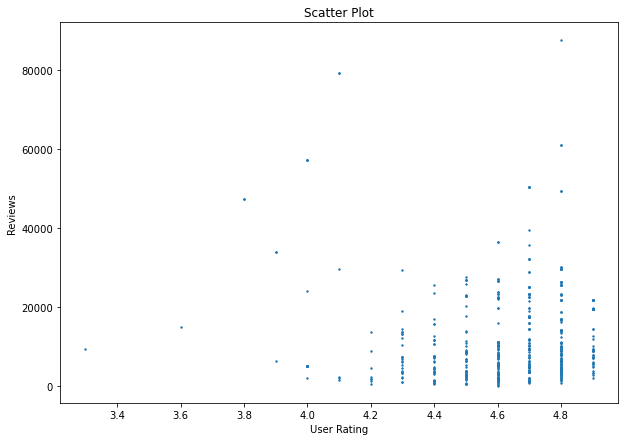

In [30]:
# 2 
x,y=AmazonD['User Rating'],AmazonD['Reviews']
plt.figure(figsize=(10,7))
plt.title('Scatter Plot')
plt.xlabel('User Rating')
plt.ylabel('Reviews')
plt.scatter(x,y,s=2)   
plt.show()

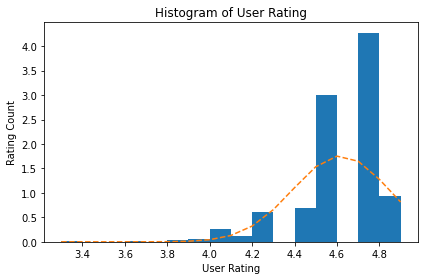

In [31]:
# 3 histogram

mu = st.mean(AmazonD["User Rating"] )
sigma = st.stdev(AmazonD["User Rating"]) 
x = AmazonD["User Rating"]

num_bins = int((max(AmazonD["User Rating"])-min(AmazonD["User Rating"]))/0.1)

fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('User Rating')
ax.set_ylabel('Rating Count')
ax.set_title(r'Histogram of User Rating')

fig.tight_layout()
plt.show()

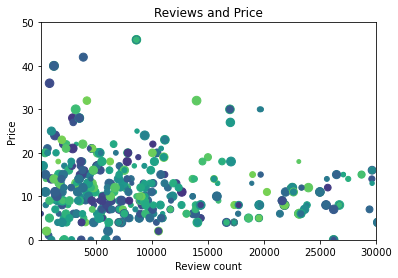

In [32]:
# 4 scatter plot

# make the data
np.random.seed(3)
x = AmazonD["Reviews"]
y = AmazonD["Price"]
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(min(AmazonD["Reviews"]), 30000),
       ylim=(min(AmazonD["Price"]), 50))
ax.set_title("Reviews and Price")
ax.set_xlabel('Review count')
ax.set_ylabel('Price')

plt.show()

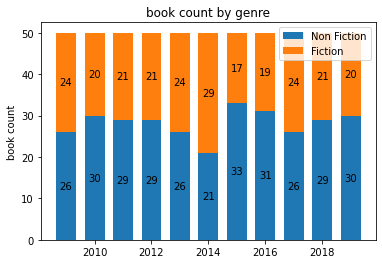

In [71]:
# 5 bar chart

labels = list(range(min(AmazonD["Year"]),max(AmazonD["Year"])+1))
N = max(AmazonD["Year"])-min(AmazonD["Year"])+1
non=[]
fic = []

for i in range(min(AmazonD["Year"]),max(AmazonD["Year"])+1):
    mask1 = AmazonD["Year"] == i
    mask2 = AmazonD["Genre"] == "Fiction"
    mask3 = AmazonD["Genre"] == "Non Fiction"
    fic.append(len(AmazonD[(mask1 & mask2)]))
    non.append(len(AmazonD[(mask1 & mask3)]))

    
width = 0.7

fig, ax = plt.subplots()

nonb = ax.bar(labels,non, width, label='Non Fiction')
ficb = ax.bar(labels, fic, width,  bottom=non,
       label='Fiction')
ax.bar_label(nonb, label_type='center')
ax.bar_label(ficb, label_type='center')

ax.set_ylabel('book count')
ax.set_title('book count by genre')
ax.legend()

plt.show()


# Part I: Data Analysis –  Penguin dataset

In [75]:
# step 3 read csv file
PenguinD = pd.read_table('penguins.csv',sep=',')

In [198]:
# step 4 main statistics with pandas
print(PenguinD.describe)
print(PenguinD.head)
print(PenguinD.index)
print(PenguinD.columns)
print(PenguinD.dtypes)
print(PenguinD.size)
print(PenguinD.shape)

print(PenguinD.max(axis = 0))
print(PenguinD.min(axis = 0))
print(PenguinD.median(axis = 0))
print(PenguinD.mean(axis = 0))
print(PenguinD.std(axis = 0))

<bound method NDFrame.describe of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g 

C:\Users\User\AppData\Local\Temp/ipykernel_5164/2800994169.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.median(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_5164/2800994169.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.mean(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_5164/2800994169.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.std(axis = 0))


In [84]:
# step 5  data preprocessing
    # sum of missing entries
print(pd.isnull(PenguinD).sum(axis=0))

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [149]:
# step 5  data preprocessing
    # drop the nan
PenguinD=PenguinD.dropna()
PenguinD.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [77]:
# convert the columns with datatype string to data type categorical
    # no string in the dataset

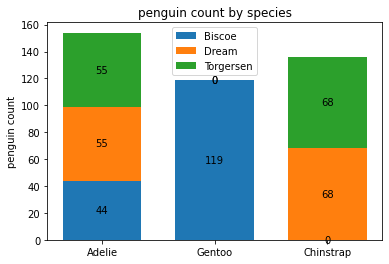

In [136]:
# 1 bar chart

sp = PenguinD["species"]
sp_all = [i for i in sp]
sp_dic = set(m for m in sp_all)
labels = list(sp_dic) 
N = len(labels)

isl = PenguinD["island"]
isl_all = [i for i in isl]
isl_dic = set(m for m in isl_all)
island = isl_dic 

island1 = []
island2 = []
island3 = []

for i in labels:
    mask1 = PenguinD["species"] == i
    mask2 = PenguinD["island"] == 'Biscoe'
    mask3 = PenguinD["island"] == 'Dream'
    mask4 = PenguinD["island"] == 'Torgersen'
    island1.append(len(PenguinD[(mask1 & mask2)]))
    island2.append(len(PenguinD[(mask1 & mask3)]))
    island3.append(len(PenguinD[(mask1 & mask4)]))

width = 0.7

fig, ax = plt.subplots()
island1b = ax.bar(labels, island1, width, label='Biscoe')
island2b = ax.bar(labels, island2, width,  bottom = island1,label='Dream')
island3b = ax.bar(labels, island2, width, bottom = np.sum([island1, island2], axis=0).tolist(),label="Torgersen" )

ax.bar_label(island1b, label_type='center')
ax.bar_label(island2b, label_type='center')
ax.bar_label(island3b, label_type='center')

ax.set_ylabel('penguin count')
ax.set_title('penguin count by species')
ax.legend()

plt.show()

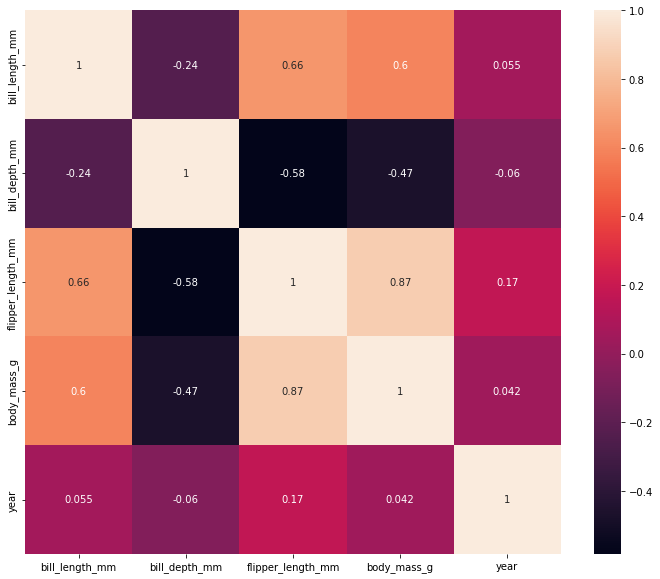

In [120]:
# 2 Heatmap
correlation=PenguinD.corr()
# print(correlation)
plt.figure(figsize=(12,10))
sn.heatmap(correlation, annot=True)
plt.show()

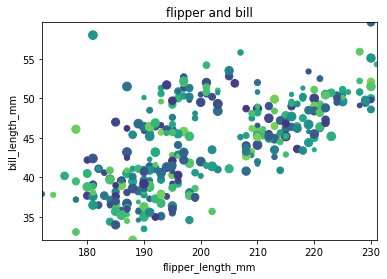

In [154]:
# 3 scatter

# make the data
x = PenguinD["flipper_length_mm"]
y = PenguinD["bill_length_mm"]
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(min(PenguinD["flipper_length_mm"]), max(PenguinD["flipper_length_mm"])),
       ylim=(min(PenguinD["bill_length_mm"]), max(PenguinD["bill_length_mm"])))
ax.set_title("flipper and bill")
ax.set_xlabel("flipper_length_mm")
ax.set_ylabel('bill_length_mm')

plt.show()

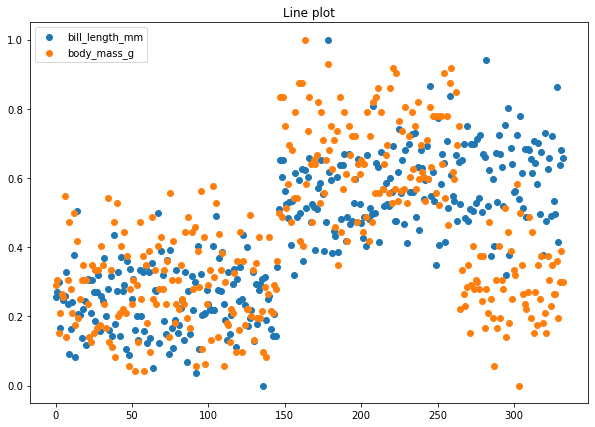

In [188]:
# 4 line plot

# P2 = PenguinD[(PenguinD["species"]=="Adelie")]
# columns1= P2['bill_length_mm']
# columns2= P2['body_mass_g']
columns1= PenguinD['bill_length_mm']
columns2= PenguinD['body_mass_g']

columns1_2 = (columns1-min(columns1))/(max(columns1)-min(columns1))
columns2_2 = (columns2-min(columns2))/(max(columns2)-min(columns2))
columns=[columns1_2,columns2_2]
x_data = range(0,len(columns1_2))
fig, ax = plt.subplots(figsize=(10,7))
fig.figsize=(12,10)
for column in columns:
    ax.scatter(x_data,column)
ax.set_title('Line plot')
ax.legend(['bill_length_mm','body_mass_g'],loc='best')
plt.show()

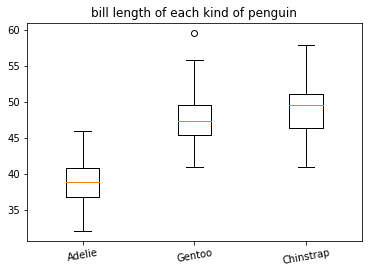

In [184]:
# 5 box plot
AP = PenguinD[(PenguinD["species"] == "Adelie")]
BP = PenguinD[(PenguinD["species"] == "Gentoo")]
CP = PenguinD[(PenguinD["species"] == "Chinstrap")]


billA = AP["bill_length_mm"]
billB = BP["bill_length_mm"]
billC = CP["bill_length_mm"]

columns = [billA, billB, billC]
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3], ["Adelie", "Gentoo", "Chinstrap"], rotation=10)
ax.set_title("bill length of each kind of penguin")
plt.show()

# Part I: Data Analysis –  Diamond dataset

In [189]:
# step 3 read csv file
DiamondD = pd.read_table('diamonds.csv',sep=',')

In [206]:
# step 4 main statistics with pandas
print(DiamondD.describe)
print(DiamondD.head)
print(DiamondD.index)
print(DiamondD.columns)
print(DiamondD.dtypes)
print(DiamondD.size)
print(DiamondD.shape)


print(DiamondD.max(axis = 0))
print(DiamondD.min(axis = 0))
print(DiamondD.median(axis = 0))
print(DiamondD.mean(axis = 0))
print(DiamondD.std(axis = 0))

<bound method NDFrame.describe of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

     

C:\Users\User\AppData\Local\Temp/ipykernel_5164/2032011411.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(DiamondD.median(axis = 0))


Unnamed: 0    26970.500000
carat             0.797940
depth            61.749405
table            57.457184
price          3932.799722
x                 5.731157
y                 5.734526
z                 3.538734
dtype: float64
Unnamed: 0    15571.281097
carat             0.474011
depth             1.432621
table             2.234491
price          3989.439738
x                 1.121761
y                 1.142135
z                 0.705699
dtype: float64


C:\Users\User\AppData\Local\Temp/ipykernel_5164/2032011411.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(DiamondD.mean(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_5164/2032011411.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(DiamondD.std(axis = 0))


In [201]:
# step 5  data preprocessing
    # sum of missing entries
print(pd.isnull(DiamondD).sum(axis=0))

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [202]:
# step 5  data preprocessing
    # no missing

In [203]:
# convert the columns with datatype string to data type categorical
    # no string in the dataset

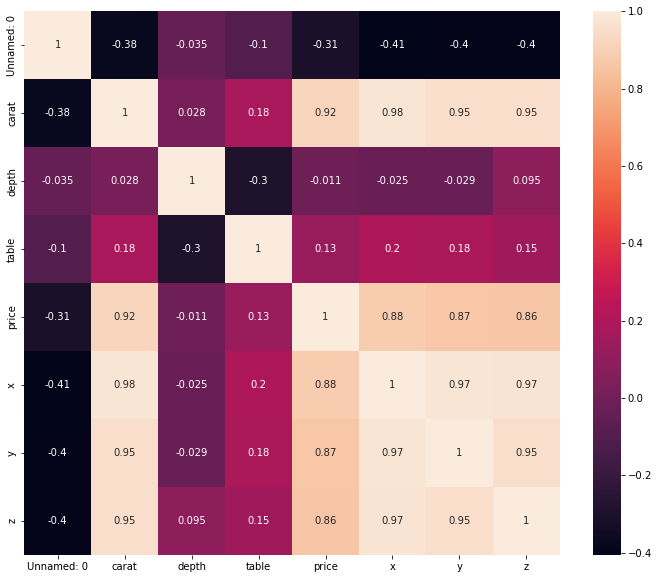

In [207]:
# 1
correlation=DiamondD.corr()
# print(correlation)
plt.figure(figsize=(12,10))
sn.heatmap(correlation, annot=True)
plt.show()

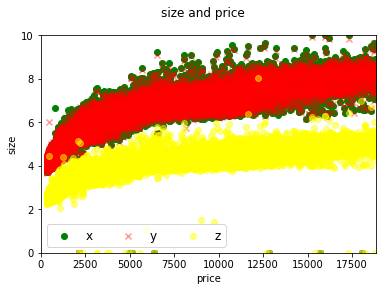

In [232]:
#2
x = DiamondD["price"]
y1 = DiamondD['x']
y2 = DiamondD['y']
y3 = DiamondD['z']

# Scatter Plot color array

X=plt.scatter(x, y1, color='green',marker='o',alpha=1)
Y=plt.scatter(x, y2, color='red',marker='x',alpha=0.4)
Z=plt.scatter(x, y3, color='yellow',marker='o',alpha=0.5)


# Display
plt.legend((X,Y,Z),
           ('x', 'y', 'z'),
           scatterpoints=1,
           loc='lower left',
           ncol=5,
           fontsize=12)

plt.ylim([0, 10])
plt.xlim([0,max(DiamondD["price"])])
plt.suptitle("size and price")
plt.xlabel("price")
plt.ylabel('size')
plt.show()

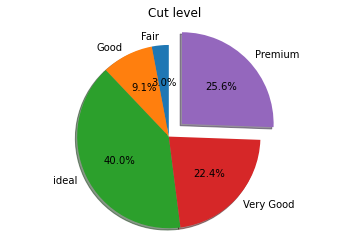

In [255]:
# 3
labels = 'Fair', 'Good','ideal', 'Very Good', 'Premium'
size = [sum(DiamondD["cut"]=='Fair'),sum(DiamondD["cut"]=='Good'),\
                                         sum(DiamondD["cut"]=='Ideal'),\
                                             sum(DiamondD["cut"]=='Very Good'),\
                                                 sum(DiamondD["cut"]=='Premium')]
sizes = [x *100/ sum(size) for x in size]
explode = (0, 0, 0, 0,0.2) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Cut level')
plt.show()

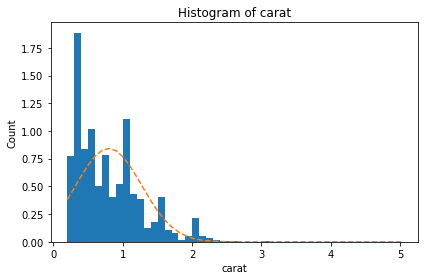

In [236]:
# 4
mu = st.mean(DiamondD["carat"] )
sigma = st.stdev(DiamondD["carat"] ) 
x = DiamondD["carat"]

num_bins = int((max(DiamondD["carat"] )-min(DiamondD["carat"] ))/0.1)

fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('carat')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of carat')

fig.tight_layout()
plt.show()

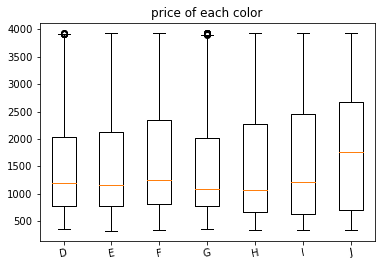

In [248]:
# 5
DiamondD2 = DiamondD[(DiamondD["price"]<= np.mean(DiamondD["price"])+st.stdev(DiamondD["price"]))]

D = DiamondD2[(DiamondD2["color"] == "D")]
E = DiamondD2[(DiamondD2["color"] == "E")]
F = DiamondD2[(DiamondD2["color"] == "F")]
G = DiamondD2[(DiamondD2["color"] == "G")]
H = DiamondD2[(DiamondD2["color"] == "H")]
I = DiamondD2[(DiamondD2["color"] == "I")]
J = DiamondD2[(DiamondD2["color"] == "J")]

pD = D["price"]
pE = E["price"]
pF = F["price"]
pG = G["price"]
pH = H["price"]
pI = I["price"]
pJ = J["price"]


columns = [pD,pE,pF,pG,pH,pI,pJ]
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['D','E','F','G','H','I','J'], rotation=10)
ax.set_title("price of each color")
plt.show()